In [1]:
import dask.dataframe as dd

# Read CSV using Dask
data = dd.read_csv("E:/semester8/Grad2/dataset_after_oversampling/binary_classification.csv")

# Use .compute() to execute operations and get the information
data_info = data.compute().info()
print(data_info)

# Get the number of rows and columns using .compute()
num_rows, num_columns = data.compute().shape
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)



<class 'pandas.core.frame.DataFrame'>
Int64Index: 21087035 entries, 0 to 381465
Data columns (total 21 columns):
 #   Column           Dtype  
---  ------           -----  
 0   TP2              float64
 1   TP3              float64
 2   H1               float64
 3   DV_pressure      float64
 4   Reservoirs       float64
 5   Oil_temperature  float64
 6   Flowmeter        float64
 7   Motor_current    float64
 8   COMP             int64  
 9   DV_eletric       int64  
 10  Towers           int64  
 11  MPG              int64  
 12  LPS              int64  
 13  Pressure_switch  int64  
 14  Oil_level        int64  
 15  Caudal_impulses  int64  
 16  gpsLong          float64
 17  gpsLat           float64
 18  gpsSpeed         int64  
 19  gpsQuality       int64  
 20  status           int64  
dtypes: float64(10), int64(11)
memory usage: 3.5 GB
None
Number of rows: 21087035
Number of columns: 21


In [2]:
import pandas as pd
pandas_data = data.compute()

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import ParameterGrid
import matplotlib.pyplot as plt



In [4]:
label_column = 'status'
X = pandas_data.drop(label_column, axis=1)
y = pandas_data[label_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the resulting sets
print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)
print(pandas_data.head())

Train set shape: (14760924, 20) (14760924,)
Test set shape: (6326111, 20) (6326111,)
     TP2    TP3     H1  DV_pressure  Reservoirs  Oil_temperature  Flowmeter  \
0 -0.012  9.758  9.760       -0.028       1.576           63.350  19.049625   
1 -0.012  9.760  9.760       -0.028       1.578           63.250  19.049625   
2 -0.010  9.760  9.760       -0.028       1.578           63.325  19.040281   
3 -0.012  9.756  9.756       -0.030       1.576           63.200  19.040281   
4 -0.012  9.756  9.756       -0.030       1.578           63.150  19.049625   

   Motor_current  COMP  DV_eletric  ...  MPG  LPS  Pressure_switch  Oil_level  \
0         3.9550     1           0  ...    1    0                0          0   
1         4.0275     1           0  ...    1    0                0          0   
2         3.9450     1           0  ...    1    0                0          0   
3         3.9300     1           0  ...    1    0                0          0   
4         3.9950     1           0 

In [5]:
from datetime import datetime
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

START Train-----
END Train------

 Time taken: 4 hours 58 minutes and 37.14 seconds.
Model saved as random_forest_model_binary_classification.joblib

Random Forest Classifier:
Accuracy: 0.9705917268919246

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97   3169913
           1       0.96      0.98      0.97   3156198

    accuracy                           0.97   6326111
   macro avg       0.97      0.97      0.97   6326111
weighted avg       0.97      0.97      0.97   6326111



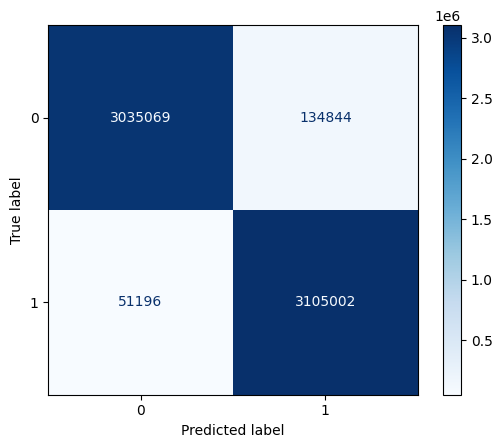

In [6]:
from datetime import datetime
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import joblib

# Define the Random Forest Classifier with specific hyperparameters
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=25,
    min_samples_split=5,
    min_samples_leaf=4,
    max_features=12,
    random_state=42
)

# Train the model on the training dataset
start_time_train = timer()
print("START Train-----")
model.fit(X, y)
print("END Train------")
timer(start_time_train)

# Save the trained model to a file
model_filename = 'random_forest_model_binary_classification.joblib'
joblib.dump(model, model_filename)
print(f"Model saved as {model_filename}")


# Start the timer for model evaluation
start_time_eval = timer()
# Assuming you have X_test and y_test from your previous split
# Evaluate the model on the test set
y_pred_forest = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_forest)

# Print results
print("\nRandom Forest Classifier:")
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_forest))

# Display confusion matrix
conf_matrix_forest = confusion_matrix(y_test, y_pred_forest)
disp_forest = ConfusionMatrixDisplay(conf_matrix_forest, display_labels=model.classes_)
disp_forest.plot(cmap='Blues', values_format='d')
plt.show()


In [7]:
import joblib
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np

# Step 1: Load the Model
model_filename = 'random_forest_model_binary_classification.joblib'
model = joblib.load(model_filename)

# Step 2: Evaluate on Training Set
train_predictions = model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print(f'Training Accuracy: {train_accuracy}')
print('Classification Report on Training Set:')
print(classification_report(y_train, train_predictions))

# Step 3: Evaluate on Test Set
test_predictions = model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f'Test Accuracy: {test_accuracy}')
print('Classification Report on Test Set:')
print(classification_report(y_test, test_predictions))



Training Accuracy: 0.9707155866394271
Classification Report on Training Set:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97   7391569
           1       0.96      0.98      0.97   7369355

    accuracy                           0.97  14760924
   macro avg       0.97      0.97      0.97  14760924
weighted avg       0.97      0.97      0.97  14760924

Test Accuracy: 0.9705917268919246
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97   3169913
           1       0.96      0.98      0.97   3156198

    accuracy                           0.97   6326111
   macro avg       0.97      0.97      0.97   6326111
weighted avg       0.97      0.97      0.97   6326111



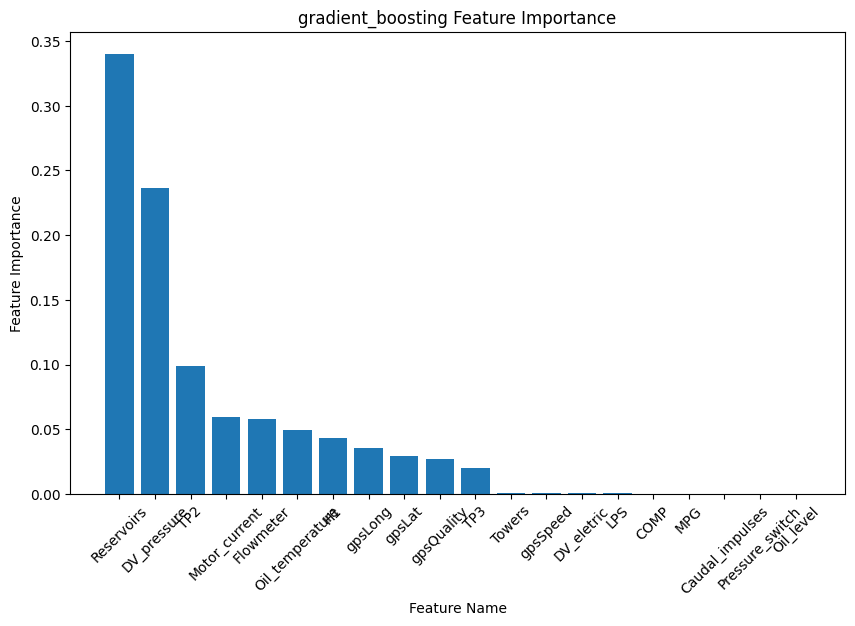

In [8]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import learning_curve

# Assuming X_train, X_test, y_train, y_test are already defined
# Assuming you have a dataset with a column named "feature_names"

# Define column names
column_names = [
    'TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 'Oil_temperature', 
    'Flowmeter', 'Motor_current', 'COMP', 'DV_eletric', 'Towers', 'MPG', 
    'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses','gpsLong','gpsLat','gpsSpeed','gpsQuality', 'status'
]

# Step 1: Load the Random Forest Model
model_filename ='random_forest_model_binary_classification.joblib'
model = joblib.load(model_filename)

# Step 2: Get Feature Importance
feature_importance = model.feature_importances_

# Step 3: Visualize Feature Importance
sorted_idx = np.argsort(feature_importance)[::-1]

# Plot the feature importances with feature names
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.xticks(range(len(sorted_idx)), [column_names[i] for i in sorted_idx], rotation=45)
plt.xlabel('Feature Name')
plt.ylabel('Feature Importance')
plt.title('gradient_boosting Feature Importance')
plt.show()

In [9]:
# Print feature names and their importance values
for feature, importance in zip([column_names[i] for i in sorted_idx], feature_importance[sorted_idx]):
    print(f"{feature}: {importance}")

Reservoirs: 0.34005278641146947
DV_pressure: 0.2364411624792555
TP2: 0.09849690287538132
Motor_current: 0.05972916591686346
Flowmeter: 0.057861702426294924
Oil_temperature: 0.049248491920179646
H1: 0.04320492915037246
gpsLong: 0.03545922622377081
gpsLat: 0.029338069288605644
gpsQuality: 0.027199946521238024
TP3: 0.020370663736661243
Towers: 0.0006604382395675758
gpsSpeed: 0.0006498200258913801
DV_eletric: 0.0004701186617078873
LPS: 0.00042397011791752055
COMP: 0.0002332837855674737
MPG: 0.00015911502850401296
Caudal_impulses: 2.0719075153735028e-07
Pressure_switch: 0.0
Oil_level: 0.0
